In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="ticks")

In [2]:
GTC_DATA_DIR = "/gws/nopw/j04/ai4er/users/pn341/earthquake-predictability/data/gtc_quakes_data"
LABQUAKES_DATA_DIR = f"{GTC_DATA_DIR}/labquakes"
MELEVEEDU_DATA_DIR = f"{LABQUAKES_DATA_DIR}/MeleVeeduetal2020"

In [3]:
b726_FILE_PATH = f"{MELEVEEDU_DATA_DIR}/b726/b726.txt"
with open(b726_FILE_PATH, "r") as file:
    lines = [next(file) for _ in range(10)]
print("".join(lines))

#  Rec lp_disp        LT            Tau           SigN          dcdtOB slip   Time          Rec       	  timedcdt       ec_disp        mu   	      Shear_Strain   Slip velocity
#   .  micro-metre    mm            MPa           MPa           micro-metre   sec           .             sec            mm             .             .      	     mic_s-1
    0  -0.0000000000  3.3908619047  0.0000000000  0.0000001000  0.0000000000  0.0000000000  0.0000000000  -0.1000000000  -0.0000000000  0.0000000000  -0.0000000000  0.0000000000
    1  -0.0000000000  3.3908609047  0.0000000000  0.0000001000  0.0000000000  1.0000000000  1.0000000000  0.9000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
    2  -0.0000000000  3.3908609047  0.0000000000  0.0000001000  0.0000000000  2.0000000000  2.0000000000  1.9000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
    3  -0.0000000000  3.3908584047  0.0000000000  0.0000001000  0.0000000000  3.0000000000  3.0000000000  2.9000000000  0.000

In [4]:
with open(b726_FILE_PATH, "r") as file:
    df = pd.read_csv(file, delim_whitespace=True, skiprows=1)

df.columns = [
    "id",
    "lp_disp",
    "lt",
    "tau",
    "sign",
    "dcdtOB",
    "slip",
    "time",
    "rec",
    "timedcdt",
    "ec_disp",
    "mu",
    "shear_strain",
    "slip_velocity",
]

df = df.drop(["id"], axis=1)

In [5]:
df

,lp_disp,lt,tau,sign,dcdtOB,slip,time,rec,timedcdt,ec_disp,mu,shear_strain,slip_velocity
0,-0.000,3.390862,0.000000,1.000000e-07,0.000000,0.00,0.0,-0.10,-0.000000,0.000000,-0.000000,0.000000,NaN
1,-0.000,3.390861,0.000000,1.000000e-07,0.000000,1.00,1.0,0.90,0.000000,0.000000,0.000000,0.000000,NaN
2,-0.000,3.390861,0.000000,1.000000e-07,0.000000,2.00,2.0,1.90,0.000000,0.000000,0.000000,0.000000,NaN
3,-0.000,3.390858,0.000000,1.000000e-07,0.000000,3.00,3.0,2.90,0.000000,0.000000,0.000000,0.000000,NaN
4,-0.000,3.390858,0.000000,1.000000e-07,0.000000,4.00,4.0,3.90,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185911,29834.612,0.558170,9.422738,1.498780e+01,16998.538081,10232.44,185911.0,10232.34,29.753939,0.628694,30.515860,23.283735,NaN
185912,29832.709,0.558108,9.410074,1.500859e+01,16998.848531,10232.45,185912.0,10232.35,29.752144,0.626979,30.512644,20.745010,NaN
185913,29833.784,0.558156,9.410817,1.499740e+01,16998.952981,10232.46,185913.0,10232.36,29.753213,0.627497,30.514559,20.237265,NaN
185914,29833.388,0.558164,9.411158,1.499606e+01,16999.253276,10232.47,185914.0,10232.37,29.752814,0.627575,30.513844,26.112600,NaN


In [6]:
subset_df = df[(df["time"] >= 80000) & (df["time"] <= 85000)].copy()

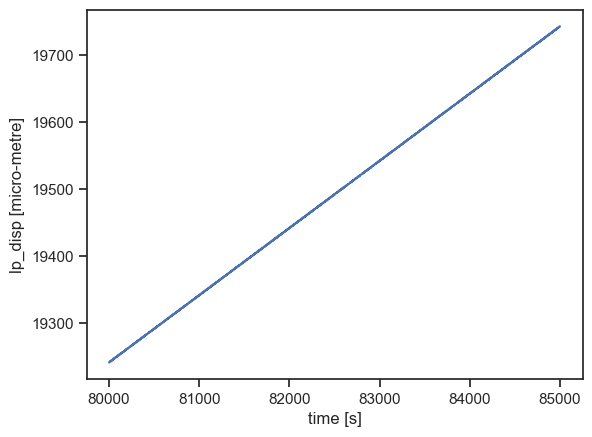

In [7]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="lp_disp")
plt.xlabel("time [s]")
plt.ylabel("lp_disp [micro-metre]")
plt.show();

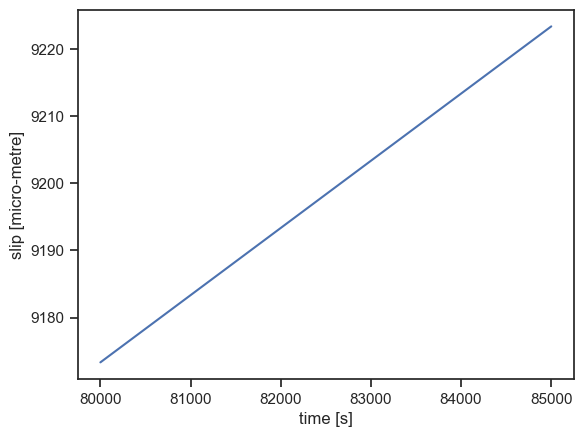

In [8]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="slip")
plt.xlabel("time [s]")
plt.ylabel("slip [micro-metre]")
plt.show();

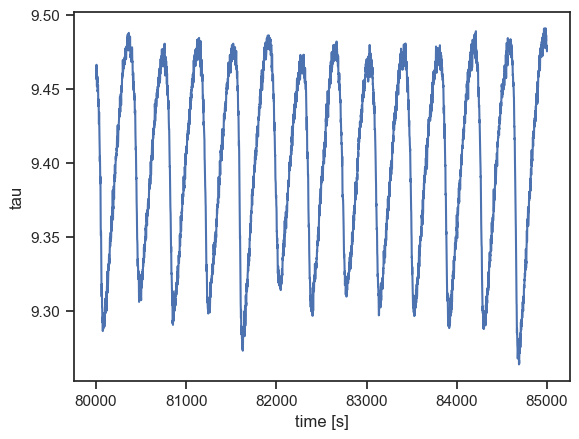

In [9]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="tau")
plt.xlabel("time [s]")
plt.ylabel("tau")
plt.show();